<a href="https://colab.research.google.com/github/Junha9/AI/blob/master/Self_Learning_ML_DL/Chapter_06_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
# download fruit data
!wget http://bit.ly/fruits_300_data -o fruits_300.npy
fruits = np.load('fruits_300_data')
fruits_2d = fruits.reshape(-1, 100*100)

In [3]:
# PCA(principle composition analysis) is kind of unsupervisied learning which reduces the dimension of the vector
pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [4]:
print(pca.components_.shape)

(50, 10000)


In [5]:
# Let's recall the fruit draw function from 06-2 to interpret principle components.
def draw_fruits(arr, ratio=1):
  n = len(arr)
  rows = int(np.ceil(n/10))
  cols = n if rows < 2 else 10
  fig, axs = plt.subplots(rows, cols, figsize=(cols * ratio, rows * ratio), squeeze=False)
  for i in range(rows):
    for j in range(cols):
      if i*10 + j < n:
        axs[i,j].imshow(arr[i*10 + j], cmap='gray_r')
      axs[i, j].axis('off')
  plt.show()

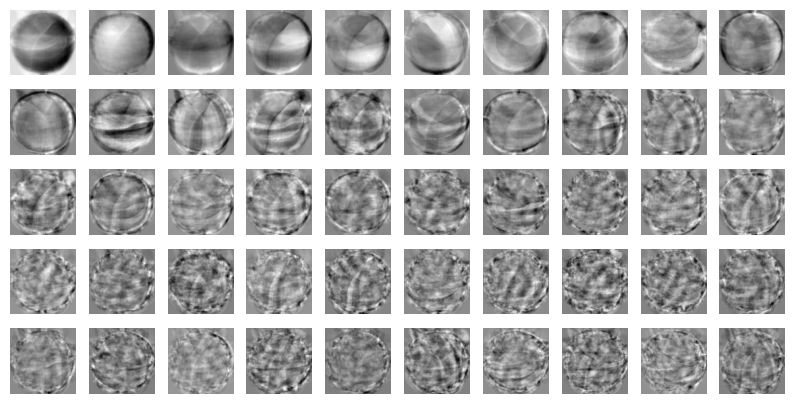

In [6]:
# Let's see how principle component looks like.
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [7]:
# We can reduce the dimension using pca.transform
print(fruits_2d.shape)
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 10000)
(300, 50)


In [8]:
# For sure, we can restore the original data using inverse_transform() method.
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


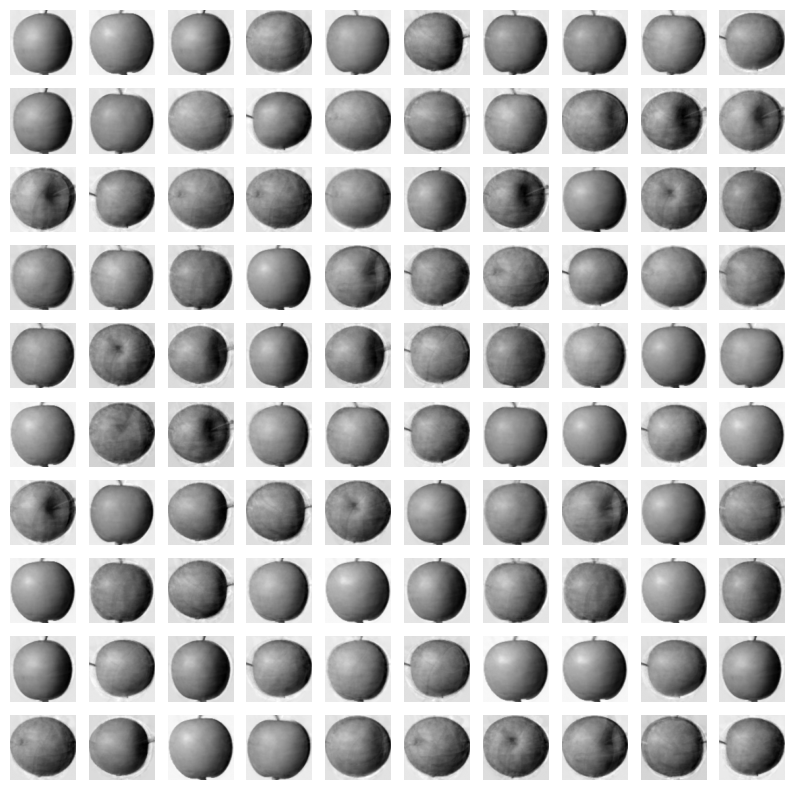

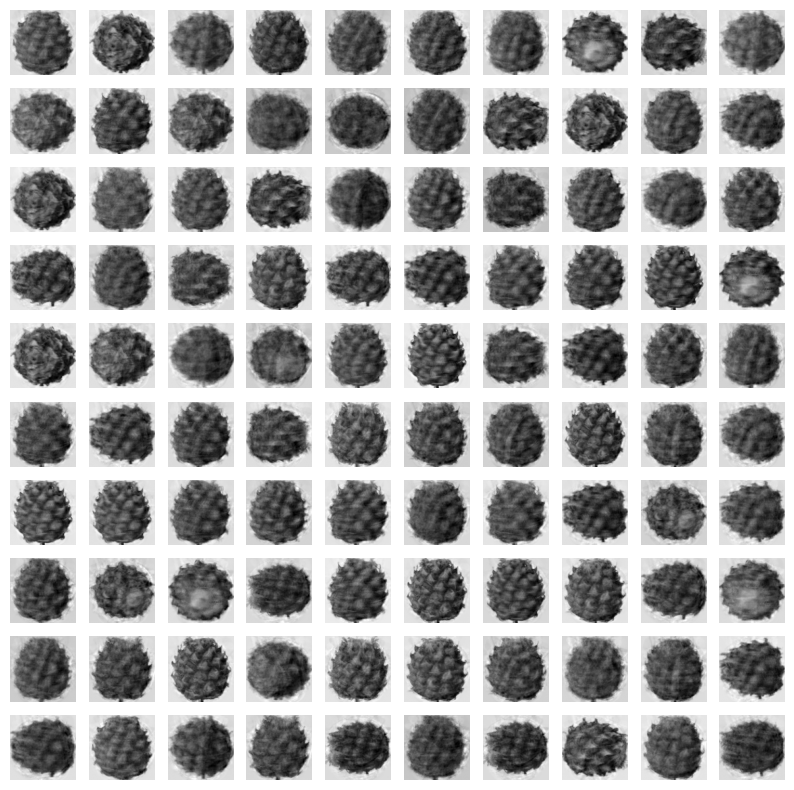

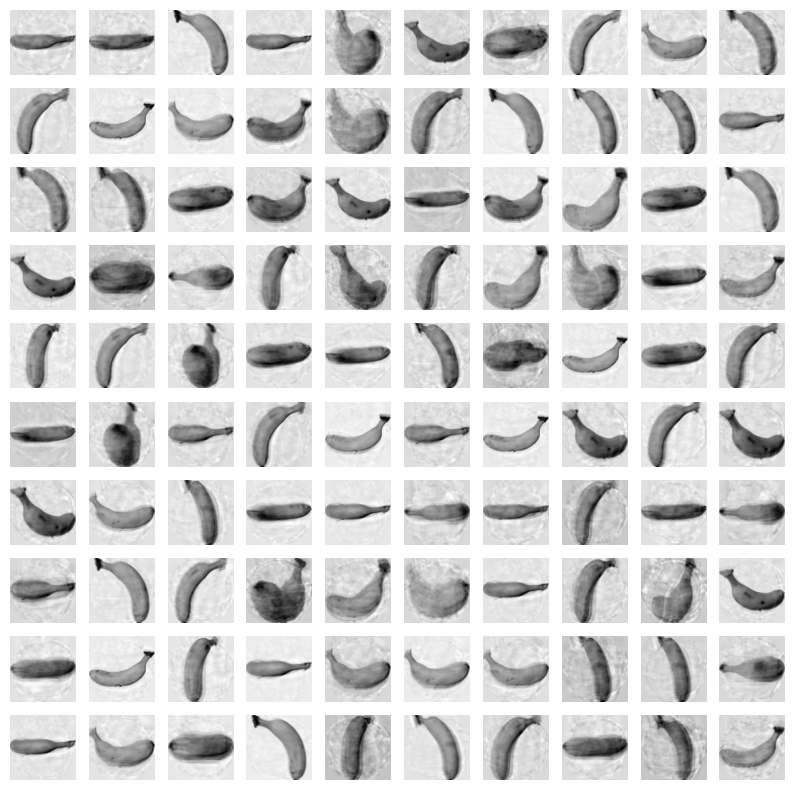

In [10]:
# Let's check if the image has been restored correctly.
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print("\n")